## Overall idea:

Younger men ride CitiBikes more than older men.

### Null hypothesis ($H_0$):

CitiBike rides taken by Millenial aged males during the months of July and August 2018 have longer durations than CitiBike rides taken by Generation X males during those same months. Although there is no universally agreed upon range of years that define Millenials and Generation X, for this analysis I will adopt the standards set by the Pew Research Center, which defines Millenials as individuals born between 1981 and 1996 and Generation X as individuals born between 1965 and 1980 (http://www.pewresearch.org/fact-tank/2018/03/01/defining-generations-where-millennials-end-and-post-millennials-begin/).

### Alternative hypothesis ($H_a$):

The duration of CitiBike rides taken by Millenial aged males in the months of July and August 2018 are the same as or shorter than CitiBike rides taken by Generation X males during those same months.

## Confidence level ($\alpha$)

The confidence level for this analysis will be .05 ($\alpha$ = .05), which is the generally accepted standard confidence level for statistical analysis.

## Data wrangling

In [1]:
# Get the environmental variable called PUIdata for this notebook
import os

os.environ["PUIdata"] = "{}/PUIdata".format(os.getenv("HOME"))

In [2]:
# Import libraries
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib.pyplot import hist
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
import scipy

%pylab inline

if os.getenv('PUI2018') is None:
    print ("Must set env variable PUI2018")
if os.getenv('PUIdata') is None:
    print ("Must set env variable PUIdata")

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2018


In [3]:
# Read the July 2018 data
!if [ -f 201807-citibike-tripdata.csv.zip ]; then echo "Already have the file"; \
else curl -O https://s3.amazonaws.com/tripdata/201807-citibike-tripdata.csv.zip > 201807-citibike-tripdata.csv.zip; fi

Already have the file


In [4]:
# Upack it into PUIdata
!if [ -f $PUIdata/201807-citibike-tripdata.csv ]; then echo "Already moved the file";\
else unzip 201807-citibike-tripdata.csv.zip -d $PUIdata; fi

Already moved the file


In [5]:
# Read the August 2018 data
!if [ -f 201808-citibike-tripdata.csv.zip ]; then echo "Already have the file"; \
else curl -O https://s3.amazonaws.com/tripdata/201808-citibike-tripdata.csv.zip > 201808-citibike-tripdata.csv.zip; fi

Already have the file


In [6]:
# Upack it into PUIdata
!if [ -f $PUIdata/201808-citibike-tripdata.csv ]; then echo "Already moved the file";\
else unzip 201808-citibike-tripdata.csv.zip -d $PUIdata; fi

Already moved the file


In [7]:
# Make sure all the data has been loaded
!ls $PUIdata

201807-citibike-tripdata.csv  acs16_final.csv  prac	  rows.csv
201808-citibike-tripdata.csv  manTrees.csv     puma	  times.txt
ACS_16			      PLUTO_for_WEB    README.md  zipfile


In [8]:
# Read the July 2018 data into a dataframe 
jul = pd.read_csv(os.getenv("PUIdata") + '/' + '201807-citibike-tripdata.csv')
aug = pd.read_csv(os.getenv("PUIdata") + '/' + '201808-citibike-tripdata.csv')

In [9]:
# Concatenate the two months of data
frames = [jul,aug]
df = pd.concat(frames)

In [10]:
# Data preview
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,500,2018-07-01 00:33:51.2640,2018-07-01 00:42:12.0280,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3236.0,W 42 St & Dyer Ave,40.758985,-73.993800,16583,Subscriber,1981,1
1,455,2018-07-01 02:06:54.0270,2018-07-01 02:14:29.0900,72.0,W 52 St & 11 Ave,40.767272,-73.993929,529.0,W 42 St & 8 Ave,40.757570,-73.990985,31481,Subscriber,1988,1
2,1080,2018-07-01 02:09:16.4640,2018-07-01 02:27:17.0290,72.0,W 52 St & 11 Ave,40.767272,-73.993929,453.0,W 22 St & 8 Ave,40.744751,-73.999154,25004,Subscriber,1982,2
3,632,2018-07-01 02:55:04.5870,2018-07-01 03:05:36.7910,72.0,W 52 St & 11 Ave,40.767272,-73.993929,465.0,Broadway & W 41 St,40.755136,-73.986580,25867,Subscriber,1986,1
4,1676,2018-07-01 03:24:27.4350,2018-07-01 03:52:23.7760,72.0,W 52 St & 11 Ave,40.767272,-73.993929,3425.0,2 Ave & E 104 St,40.789210,-73.943708,31351,Subscriber,1992,1


In [11]:
# Narrow the data to Millenial and Generation X aged male riders
df = df[df['gender'] == 1]
df = df[(df['birth year'] >= 1965) & (df['birth year'] <= 1996)]

In [12]:
# Keep only the birth year and gender columns
df = df[['birth year','tripduration']]
df.head(5)

,birth year,tripduration
0,1981,500
1,1988,455
3,1986,632
4,1992,1676
8,1974,1248


In [41]:
df.shape

(2156178, 2)

In [13]:
# Rename the columns for ease of use
df.columns = ['birth_year','trip_duration']

## Final dataframe

In [42]:
df.head(5)

,birth_year,trip_duration
0,1981,500
1,1988,455
3,1986,632
4,1992,1676
8,1974,1248


## Plotting

Text(0.5,0,'Birth Year')

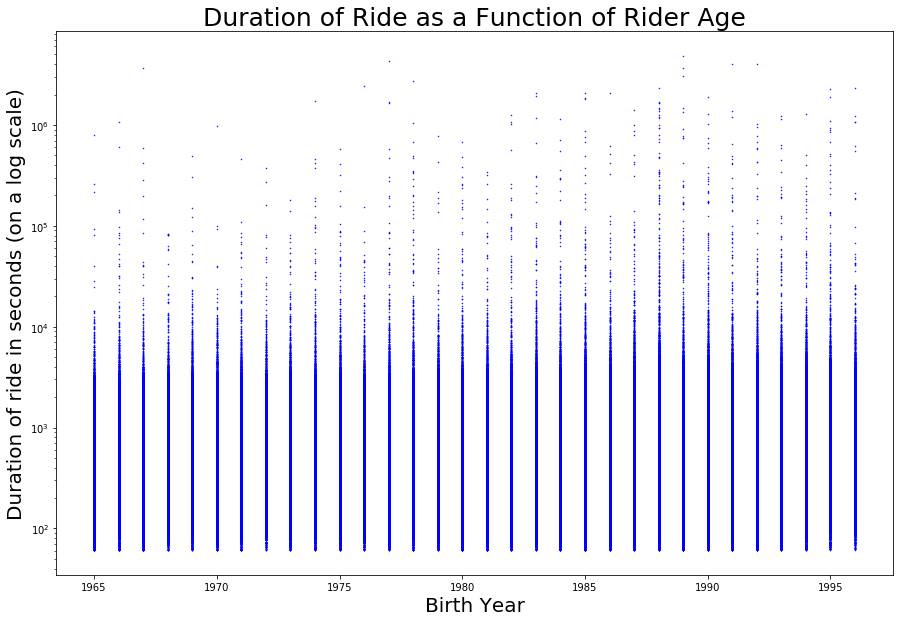

In [15]:
# Create a scatter plot of the data
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(df.birth_year, df.trip_duration, 'o', c='blue', markersize=.5)
ax.set_yscale('log')
ax.set_title('Duration of Ride as a Function of Rider Age', fontsize = 25)
ax.set_ylabel('Duration of ride in seconds (on a log scale)', fontsize = 20)
ax.set_xlabel('Birth Year', fontsize = 20)

## Notes on the above plot

The plot above of shows the duration of each ride (in seconds) taken by Millenial and Generation X male CitiBike riders in the months of July and August 2018. 

Note that the y axis (trip duration) is plotted on a logarithmic scale in order to make the plot more readable. Without a logarithmic scale, the plot is skewed due to a select number of rides with durations in the hundreds of thousands or even millions (see the sample of the dataframe sorted by trip duration). These trips were either recorded in error (a trip lasting millions of seconds is equivalent to dozens of days) or were not actually rides but were cases where a bike was taken out and then not returned to a dock for other reasons (it may have been taken out of circulation for repair work or could have been stolen). These data points may need to be removed to conduct a more accurate analysis.

## Refining the analysis

After reviewing the above plot, one of my peers pointed out that the plot does not clearly display any trends that may or may not exist between rider age and trip duration. In order to make the analysis more clear, my colleague suggested that I calculate the average ride duration for each birth year:

In [34]:
# Calculate average ride duration per birth year
avgride = df.groupby('birth_year')['trip_duration'].agg(np.mean).reset_index(name='trip_duration')

In [17]:
avgride.head(5)

,birth_year,trip_duration
0,1965,794.952711
1,1966,847.231066
2,1967,867.866314
3,1968,800.016066
4,1969,821.547101


Text(0.5,0,'Birth Year')

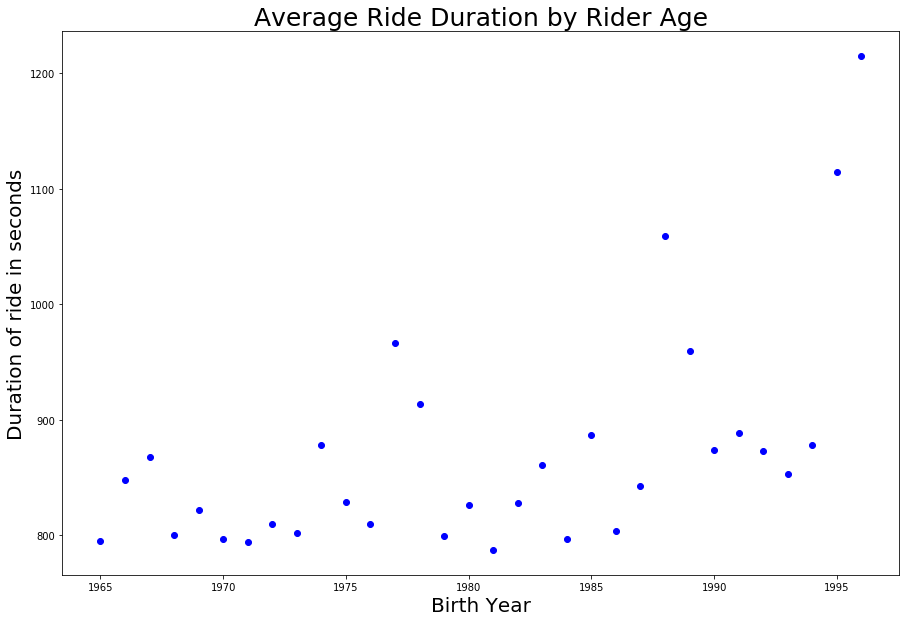

In [18]:
# Create a scatter plot of the data
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(avgride.birth_year, avgride.trip_duration, 'o', c='blue')
ax.set_title('Average Ride Duration by Rider Age', fontsize = 25)
ax.set_ylabel('Duration of ride in seconds', fontsize = 20)
ax.set_xlabel('Birth Year', fontsize = 20)

## Notes on the above plot

The plot above more clearly displays the relationship between rider birth year and ride duration. Here we can intuitively see a positive trend in average ride duration as the birth year increases (i.e. younger male CitiBike riders ride for longer, on average, than older riders).

## Statistical tests

Below, I prepare the data for Pearson's and Spearman's tests.

In [19]:
# Normalized data for Pearson's and Spearman's tests
df_ages_sort = avgride.sort_values('birth_year')
df_duration_sort = avgride.sort_values('trip_duration')

In [28]:
df_ages_sort.shape

(32, 2)

In [29]:
df_duration_sort.shape

(32, 2)

In [30]:
df_ages_sort.head(5)

,birth_year,trip_duration
0,1965,794.952711
1,1966,847.231066
2,1967,867.866314
3,1968,800.016066
4,1969,821.547101


In [31]:
df_duration_sort.head(5)

,birth_year,trip_duration
16,1981,786.922463
6,1971,794.080791
0,1965,794.952711
5,1970,796.569522
19,1984,796.745187


In [25]:
# To run a Pearson's test
def peartest(dfsamp1, dfsamp2):
    stat = scipy.stats.pearsonr(dfsamp1, dfsamp2)
    pear = stat[0]
    pval = stat[1]
    return pear, pval

In [26]:
# To run a Spearman's test
def speartest(dfsamp1, dfsamp2):
    stat = scipy.stats.spearmanr(dfsamp1, dfsamp2)
    spear = stat[0]
    pval = stat[1]
    return spear, pval    

In [27]:
print("Pearson's test for rider age v duration - correlation coefficient and p value: " \
      + str(peartest(df_ages_sort.birth_year,df_duration_sort.trip_duration)))

print("")

print("Spearman's test for rider age v duration - correlation coefficient and p value: " \
      + str(speartest(df_ages_sort.birth_year,df_duration_sort.trip_duration)))

Pearson's test for rider age v duration - correlation coefficient and p value: (0.82091275175984324, 8.6980211232492458e-09)

Spearman's test for rider age v duration - correlation coefficient and p value: (1.0, 0.0)


## Results of tests and room for improvement

Although the results of the Pearson's and Spearman's tests do confirm my initial theory that younger CitiBike riders tend to ride for longer, the results of the two tests cannot be taken at face value. Although the ride duration averages were calculated based on over 2 million individual CitiBike rides, each test was ultimately performed on only 32 data points. The results therefore are less powerful.

One way to strengthen the analysis would be to incorporate more data both into the initial ride duration averaging and the final analysis of average rides by rider birth year. In the following cells, I create a second dataframe that includes rides from CitiBike riders of all genders and ages. I then calculate the average ride duration for each birth year and perform Pearson's and Spearman's statistical tests.

In [32]:
# Create alternate dataframe with no filtering for gender or birth year
otherdf = pd.concat(frames)

In [35]:
otherdf = otherdf[['birth year','tripduration']]
otherdf.columns = ['birth_year','trip_duration']

In [36]:
# Get averages
otheravgride = otherdf.groupby('birth_year')['trip_duration'].agg(np.mean).reset_index(name='trip_duration')

Text(0.5,0,'Birth Year')

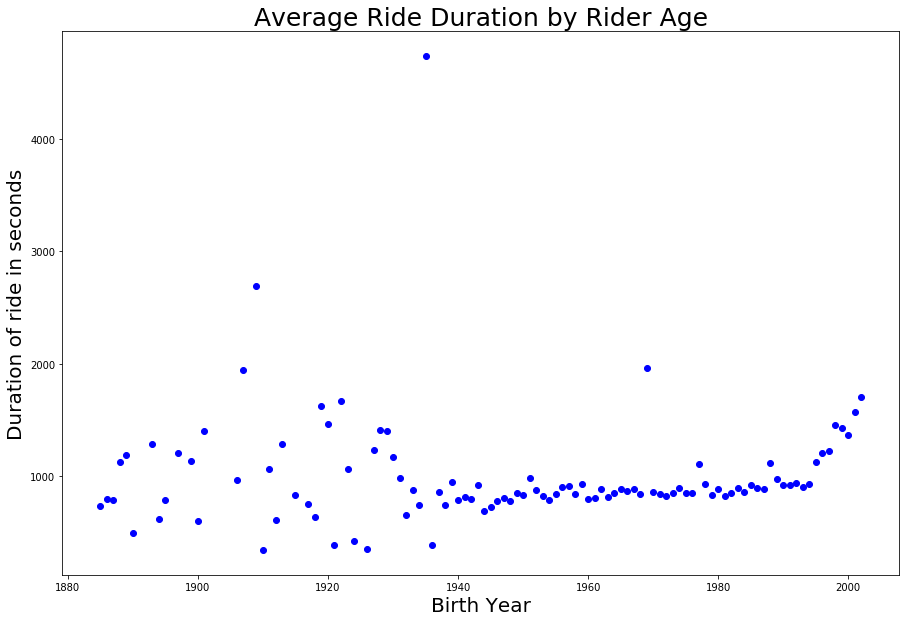

In [37]:
# Create a scatter plot of the data
fig = plt.figure(figsize=(15,10))
ax = plt.gca()
ax.plot(otheravgride.birth_year, otheravgride.trip_duration, 'o', c='blue')
ax.set_title('Average Ride Duration by Rider Age', fontsize = 25)
ax.set_ylabel('Duration of ride in seconds', fontsize = 20)
ax.set_xlabel('Birth Year', fontsize = 20)

## Notes on the above plot:

Like the previous plot, we see a positive trend in average ride duration as birth year increases. But we'll want to run tests on the data to confirm whether or not this correlation actually exists and whether or not it is statistically significant.

In [38]:
otherdf_ages_sort = otheravgride.sort_values('birth_year')
otherdf_duration_sort = otheravgride.sort_values('trip_duration')

In [40]:
print("Pearson's test for rider age v duration - correlation coefficient and p value: " \
      + str(peartest(otherdf_ages_sort.birth_year,otherdf_duration_sort.trip_duration)))

print("")

print("Spearman's test for rider age v duration - correlation coefficient and p value: " \
      + str(speartest(otherdf_ages_sort.birth_year,otherdf_duration_sort.trip_duration)))

Pearson's test for rider age v duration - correlation coefficient and p value: (0.69077292590433514, 2.5323780406206721e-16)

Spearman's test for rider age v duration - correlation coefficient and p value: (1.0, 0.0)


## Conclusion

With more data, we see the correlation coefficient for the Pearson's test decrease and the p-value increase past my CI threshold of .05. Still, the Spearman's test produces a perfect correlation coefficient of 1 with a p-value of 0. The results of the tests for the larger data sets do not necessarily undermine the results of the previous tests with the data for male riders born between 1965 and 1996. But they do suggest that the correlational relationship between birth year and average ride duration isn't quite as cut and dry as one might think upon first glance. An additional analysis could further explore the limitations of Pearson's and Spearman's tests in this context.